Exploratory data analysis is a crucial step in any data workflow. Create a Jupyter Notebook that explores your data mathematically and visually. Explore features, apply descriptive statistics, look at distributions, and determine how to handle sampling or any missing values.

Requirements:

1.Create an exploratory data analysis notebook. <br>2. Determine how to handle sampling or missing values.  <br>3. Perform statistical analysis, along with any visualizations. <br>4. Clearly identify shortcomings, assumptions, and next steps.

Submission:

Due Tuesday May 8.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix

ow = pd.read_csv('assets/overwatch-diary.csv', index_col = 0)


<center><b>Data Dictionary:</b> https://docs.google.com/document/d/1aYqMaddLpN0Skgwa17HRg-jwqOZ0NVLyWd1-zyTXGro/edit?usp=sharing</center><br><br>

## 1. EXPLORATORY DATA ANALYSIS

In [2]:
#Review columns
ow.head()

,result,game_id,sr_start,sr_finish,streak_number,my_team_sr,enemy_team_sr,map,round,capscore,...,character_2,character_3,psychological_condition,eliminations,objective_kills,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists
season,,,,,,,,,,,,,,,,,,,,,
3,W,144.0,NaN,NaN,NaN,2912.0,2935.0,Hollywood,2.0,2.0,...,NaN,NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,W,29.0,2866.0,2896.0,2.0,2532.0,2510.0,Oasis,5.0,NaN,...,NaN,NaN,Tense,41.0,26.0,10648.0,11816.0,13.0,19.0,11.0
3,W,508.0,2759.0,2782.0,NaN,2882.0,2865.0,Ilios,NaN,NaN,...,Ana,NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L,250.0,NaN,NaN,NaN,2113.0,2031.0,Eichenwalde,2.0,2.0,...,NaN,NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,W,NaN,NaN,NaN,1.0,2637.0,2613.0,Volskaya Industries,2.0,1.0,...,NaN,NaN,Good,10.0,1.0,5001.0,3252.0,1.0,33.0,6.0


In [3]:
#determine data types of each feature
ow.dtypes

result                      object
game_id                    float64
sr_start                   float64
sr_finish                  float64
streak_number              float64
my_team_sr                 float64
enemy_team_sr              float64
map                         object
round                      float64
capscore                   float64
score_distance             float64
team_role                   object
match_length               float64
charcter_1                  object
character_2                 object
character_3                 object
psychological_condition     object
eliminations               float64
objective_kills            float64
healing                    float64
deaths                     float64
weapon_accuracy            float64
offensive_assists          float64
defensive_assists          float64
dtype: object

In [4]:
#get general info of float features
ow.describe()

,game_id,sr_start,sr_finish,streak_number,my_team_sr,enemy_team_sr,round,capscore,score_distance,match_length,eliminations,objective_kills,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists
count,2490.000000,1572.000000,1572.000000,2180.000000,2927.000000,2918.000000,3069.000000,2858.000000,1324.000000,3030.000000,271.000000,271.000000,269.000000,269.000000,265.000000,149.000000,109.000000
mean,175.240161,2545.237913,2545.984097,2.005046,2651.471472,2651.353324,1.940371,1.512946,72.364267,6.850323,14.948339,7.933579,5852.706320,9825.516729,9.452830,33.966443,7.669725
std,137.783324,207.635807,207.309740,1.744452,230.391151,233.414877,1.006188,1.082528,120.595297,10.646981,10.412826,6.974771,4195.568791,4692.357682,5.582596,13.700176,9.068724
min,1.000000,1966.000000,1966.000000,0.000000,1956.000000,1937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,66.250000,2425.750000,2426.000000,1.000000,2523.000000,2519.000000,1.000000,1.000000,60.530000,4.000000,7.000000,2.000000,2534.000000,6677.000000,6.000000,24.000000,4.000000
50%,146.500000,2571.500000,2572.000000,1.000000,2656.000000,2657.500000,2.000000,2.000000,71.750000,6.000000,14.000000,6.000000,5418.000000,9460.000000,9.000000,28.000000,6.000000
75%,223.000000,2680.000000,2681.000000,3.000000,2821.000000,2823.000000,2.000000,2.000000,82.417500,8.000000,21.000000,11.000000,8638.000000,12862.000000,12.000000,44.000000,9.000000
max,538.000000,3017.000000,3008.000000,13.000000,3178.000000,3172.000000,6.000000,4.000000,4375.000000,535.000000,46.000000,34.000000,19226.000000,23700.000000,59.000000,66.000000,80.000000


## 2. DETERMINE HOW TO HANDLE MISSING VALUES

In [5]:
# Review missing values in each column
count_nan = len(ow) - ow.count()
count_nan

result                        0
game_id                     708
sr_start                   1626
sr_finish                  1626
streak_number              1018
my_team_sr                  271
enemy_team_sr               280
map                           0
round                       129
capscore                    340
score_distance             1874
team_role                     0
match_length                168
charcter_1                    0
character_2                2694
character_3                3147
psychological_condition       0
eliminations               2927
objective_kills            2927
healing                    2929
deaths                     2929
weapon_accuracy            2933
offensive_assists          3049
defensive_assists          3089
dtype: int64

In [6]:
ow.mean()

game_id               175.240161
sr_start             2545.237913
sr_finish            2545.984097
streak_number           2.005046
my_team_sr           2651.471472
enemy_team_sr        2651.353324
round                   1.940371
capscore                1.512946
score_distance         72.364267
match_length            6.850323
eliminations           14.948339
objective_kills         7.933579
healing              5852.706320
deaths               9825.516729
weapon_accuracy         9.452830
offensive_assists      33.966443
defensive_assists       7.669725
dtype: float64

In [7]:
#finding missing values of float features
ow.median()

game_id               146.50
sr_start             2571.50
sr_finish            2572.00
streak_number           1.00
my_team_sr           2656.00
enemy_team_sr        2657.50
round                   2.00
capscore                2.00
score_distance         71.75
match_length            6.00
eliminations           14.00
objective_kills         6.00
healing              5418.00
deaths               9460.00
weapon_accuracy         9.00
offensive_assists      28.00
defensive_assists       6.00
dtype: float64

In [8]:
#the significant missing values are mostly from float features, so let's fill nulls with the feature median
ow.fillna(ow.median(),inplace=True)

columns = ['game_id',        
'sr_start',       
'sr_finish',      
'streak_number',  
'my_team_sr',     
'enemy_team_sr',  
'round',          
'capscore',       
'score_distance', 
'match_length',   
'eliminations',   
'objective_kills',
'healing',        
'deaths',         
'weapon_accuracy',
'offensive_assists',
'defensive_assists']
for column in columns:
     ow[column].fillna(ow[column].mean(), inplace=True)

In [9]:
#confirming that null values are now filled w median
ow.describe()

,game_id,sr_start,sr_finish,streak_number,my_team_sr,enemy_team_sr,round,capscore,score_distance,match_length,eliminations,objective_kills,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists
count,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000
mean,168.877423,2558.590682,2559.211695,1.685116,2651.855222,2651.891495,1.942777,1.564728,72.004312,6.805654,14.080363,6.163852,5454.565353,9490.745466,9.037523,28.277986,6.056911
std,122.157542,146.143410,145.904738,1.514388,220.413783,222.965987,0.985749,1.034304,77.578661,10.365198,3.037579,2.097270,1220.729454,1362.370101,1.609082,3.204815,1.694131
min,1.000000,1966.000000,1966.000000,0.000000,1956.000000,1937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,89.000000,2571.500000,2572.000000,1.000000,2534.000000,2531.000000,1.000000,1.000000,71.750000,4.000000,14.000000,6.000000,5418.000000,9460.000000,9.000000,28.000000,6.000000
50%,146.500000,2571.500000,2572.000000,1.000000,2656.000000,2657.500000,2.000000,2.000000,71.750000,6.000000,14.000000,6.000000,5418.000000,9460.000000,9.000000,28.000000,6.000000
75%,200.000000,2571.500000,2572.000000,2.000000,2809.000000,2808.000000,2.000000,2.000000,71.750000,8.000000,14.000000,6.000000,5418.000000,9460.000000,9.000000,28.000000,6.000000
max,538.000000,3017.000000,3008.000000,13.000000,3178.000000,3172.000000,6.000000,4.000000,4375.000000,535.000000,46.000000,34.000000,19226.000000,23700.000000,59.000000,66.000000,80.000000


In [10]:
#create dummy variable for each object features
#result_dummy = pd.get_dummies(ow['result'])
result_dummy = pd.get_dummies(ow['result'])
map_dummy = pd.get_dummies(ow['map'])
role_dummy = pd.get_dummies(ow['team_role'])
hero1_dummy = pd.get_dummies(ow['charcter_1'])
hero2_dummy = pd.get_dummies(ow['character_2'])
hero3_dummy = pd.get_dummies(ow['character_3'])

In [11]:
#concetenate dummies into ow
#ow = pd.concat([ow, result_dummy, map_dummy, role_dummy, hero1_dummy, hero2_dummy, hero3_dummy], axis = 1)
#ow.head()

## 3. PERFORM STATISTICAL ANALYSIS ALONG WITH ANY VISUALIZATIONS


<IPython.core.display.Javascript object>


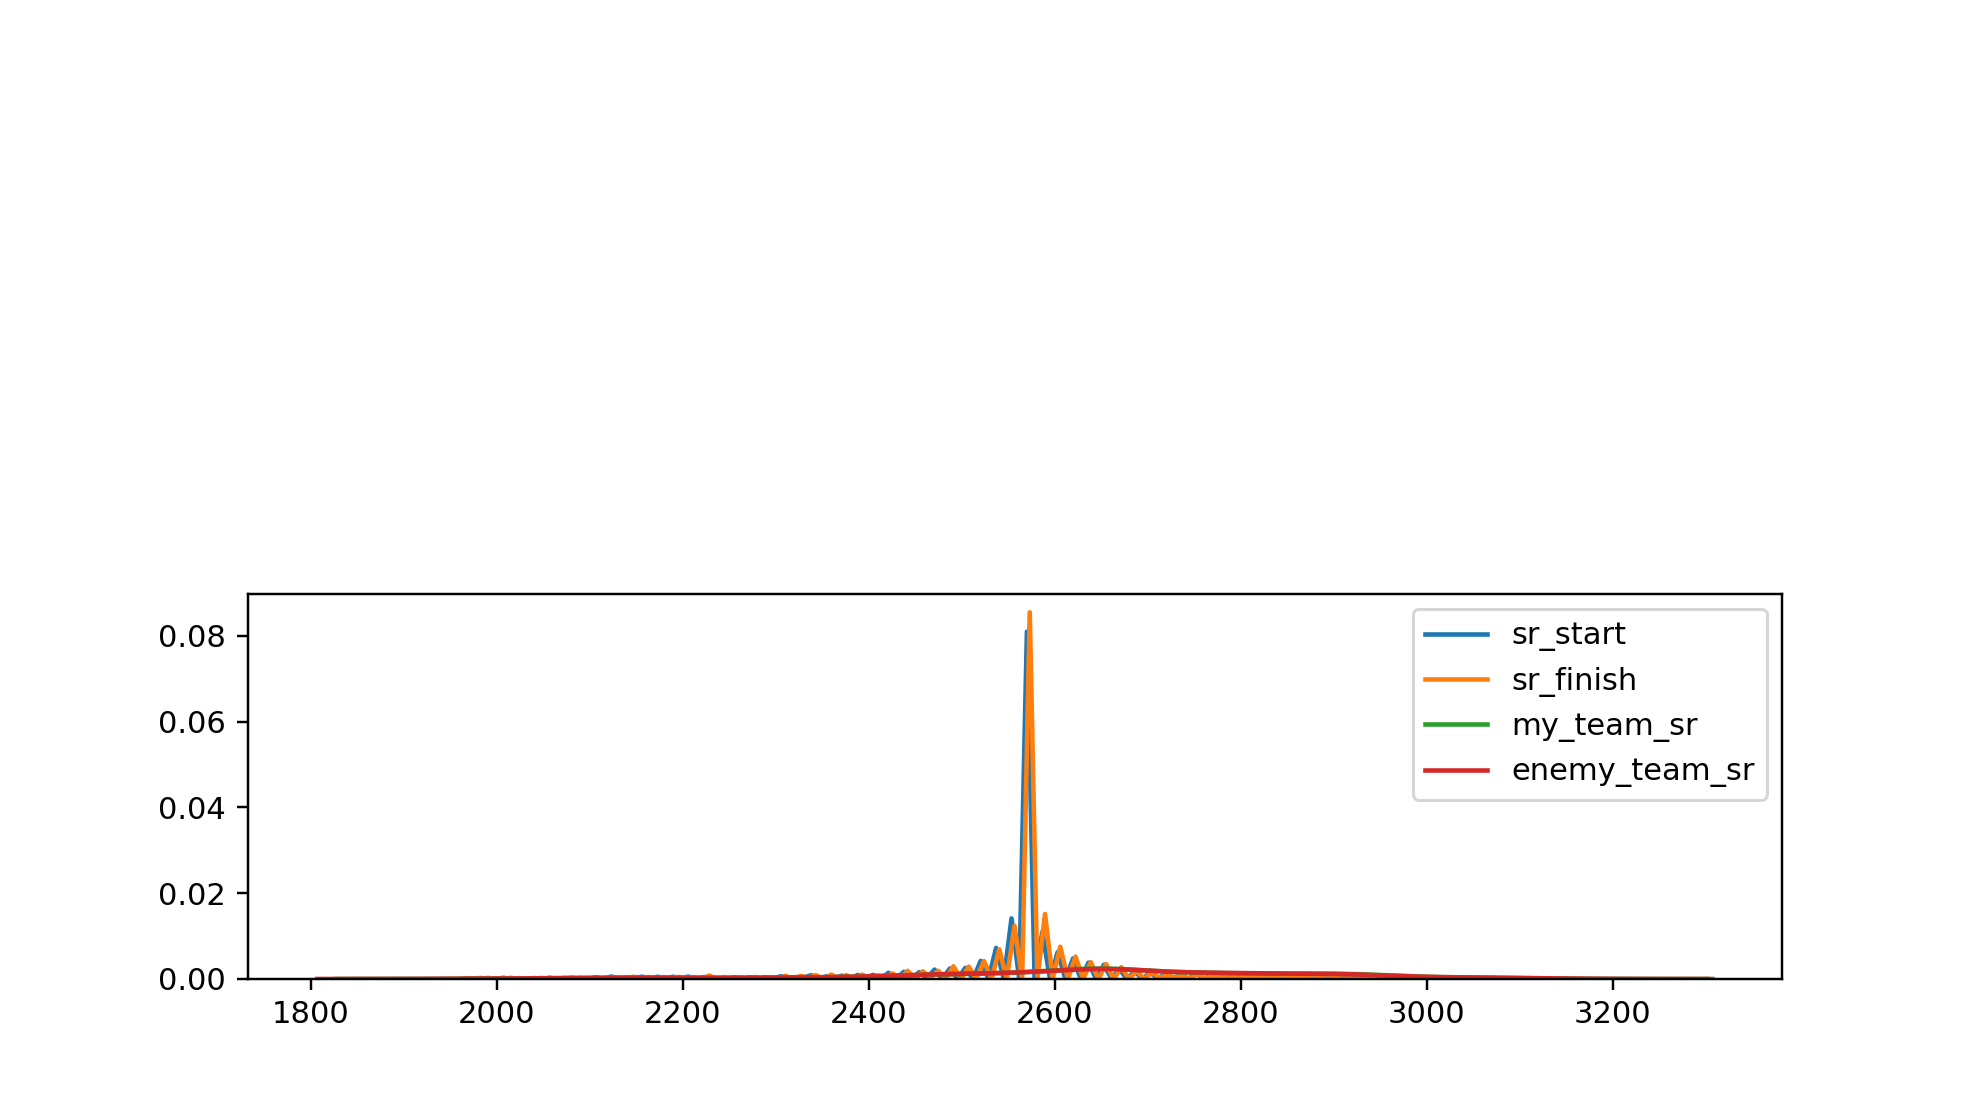

/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [12]:

plt.figure(figsize = (9, 5))


plt.subplot(212)
sns.kdeplot(ow['sr_start'])
plt.subplot(212)
sns.kdeplot(ow['sr_finish'])
plt.subplot(212)
sns.kdeplot(ow['my_team_sr'])
plt.subplot(212)
sns.kdeplot(ow['enemy_team_sr'])

<IPython.core.display.Javascript object>


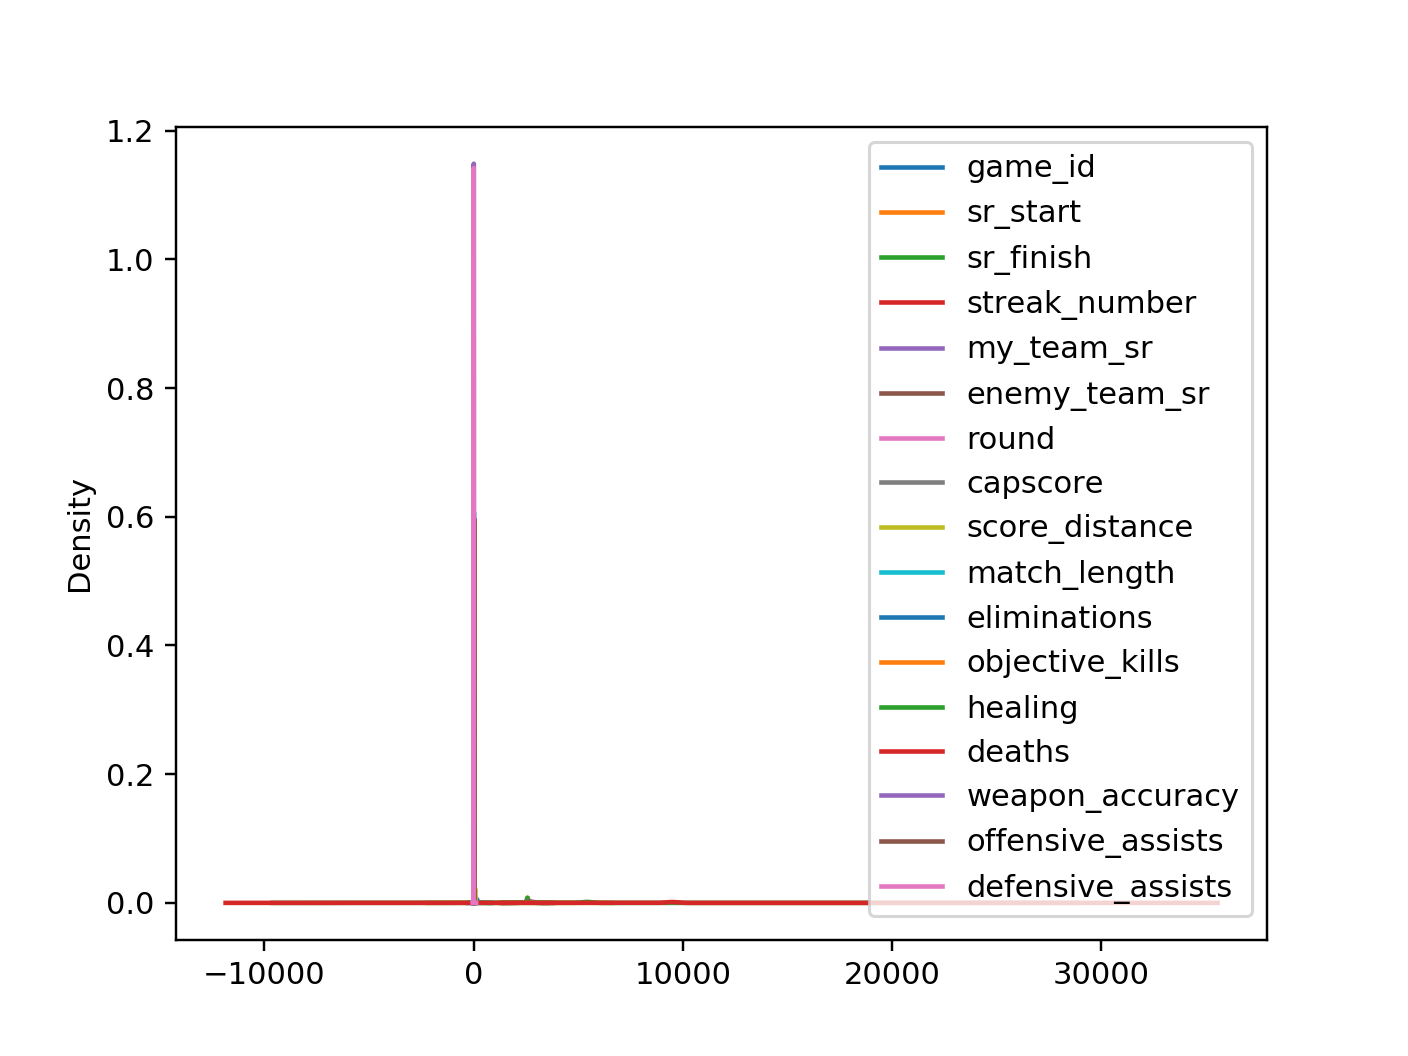

('This distribution has skew', game_id               1.211391
sr_start             -0.810138
sr_finish            -0.814296
streak_number         2.999973
my_team_sr           -0.543475
enemy_team_sr        -0.535410
round                 1.161601
capscore             -0.169225
score_distance       53.394863
match_length         41.670232
eliminations          2.961776
objective_kills       5.995982
healing               3.180221
deaths                2.448395
weapon_accuracy      10.322714
offensive_assists     7.815835
defensive_assists    34.303720
dtype: float64)
('This distribution has kurtosis', game_id                 1.044316
sr_start                2.940676
sr_finish               2.958182
streak_number          12.484290
my_team_sr              0.368133
enemy_team_sr           0.412901
round                   1.109297
capscore               -1.093205
score_distance       2963.122999
match_length         2111.318789
eliminations           34.015146
objective_kills        55.08

In [13]:
#determining if distributions have skew/kurtosis
ow.plot(kind = 'density')
print('This distribution has skew', ow.skew())
print('This distribution has kurtosis', ow.kurt())

<IPython.core.display.Javascript object>


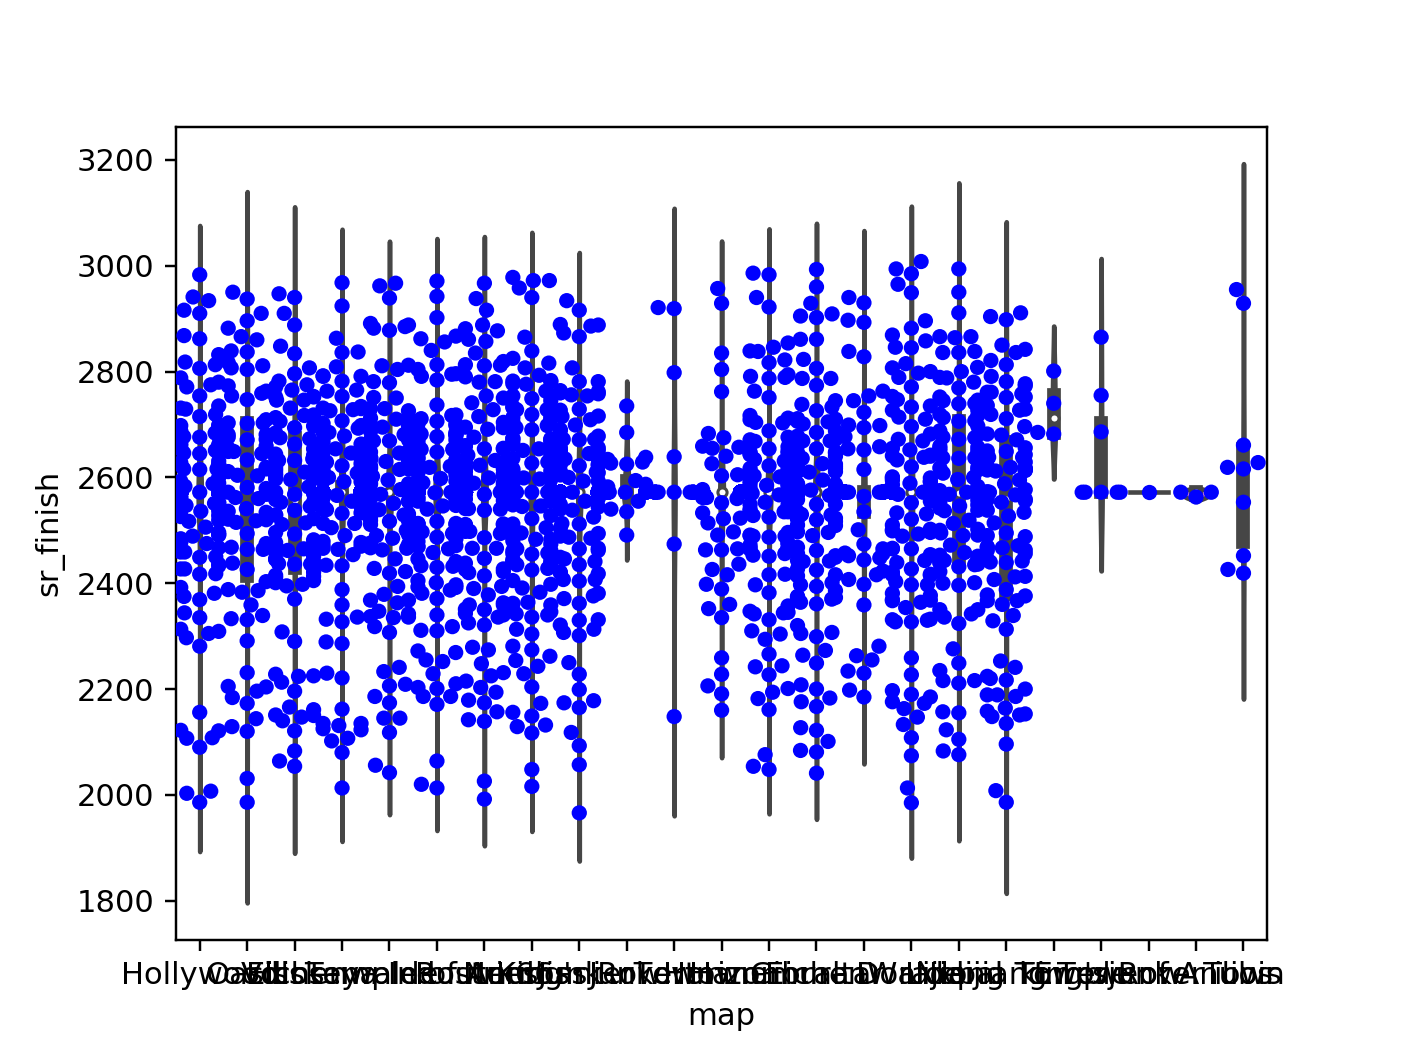

In [14]:
plt.figure()
sns.violinplot("map", "sr_finish", data = ow, split = True)
sns.swarmplot("map", "sr_finish", data = ow, color = "b",dodge = True)

In [49]:
#ATTEMPTING TO DECIPHER 'PSYCHOLOGICAL_CONDITION' COLUMN
#1. tokenizing
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')
tokens = tokenizer.tokenize(str(ow['psychological_condition']))

In [54]:
#checking frequency distribution of most common phrases
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'Good': 15,
          'Great': 2,
          'Length': 1,
          'Meh': 9,
          'Name': 1,
          'Tense': 1,
          'Tilted': 2,
          'dtype': 1,
          'na': 31,
          'object': 1,
          'psychological_condition': 1,
          'season': 1})

<IPython.core.display.Javascript object>


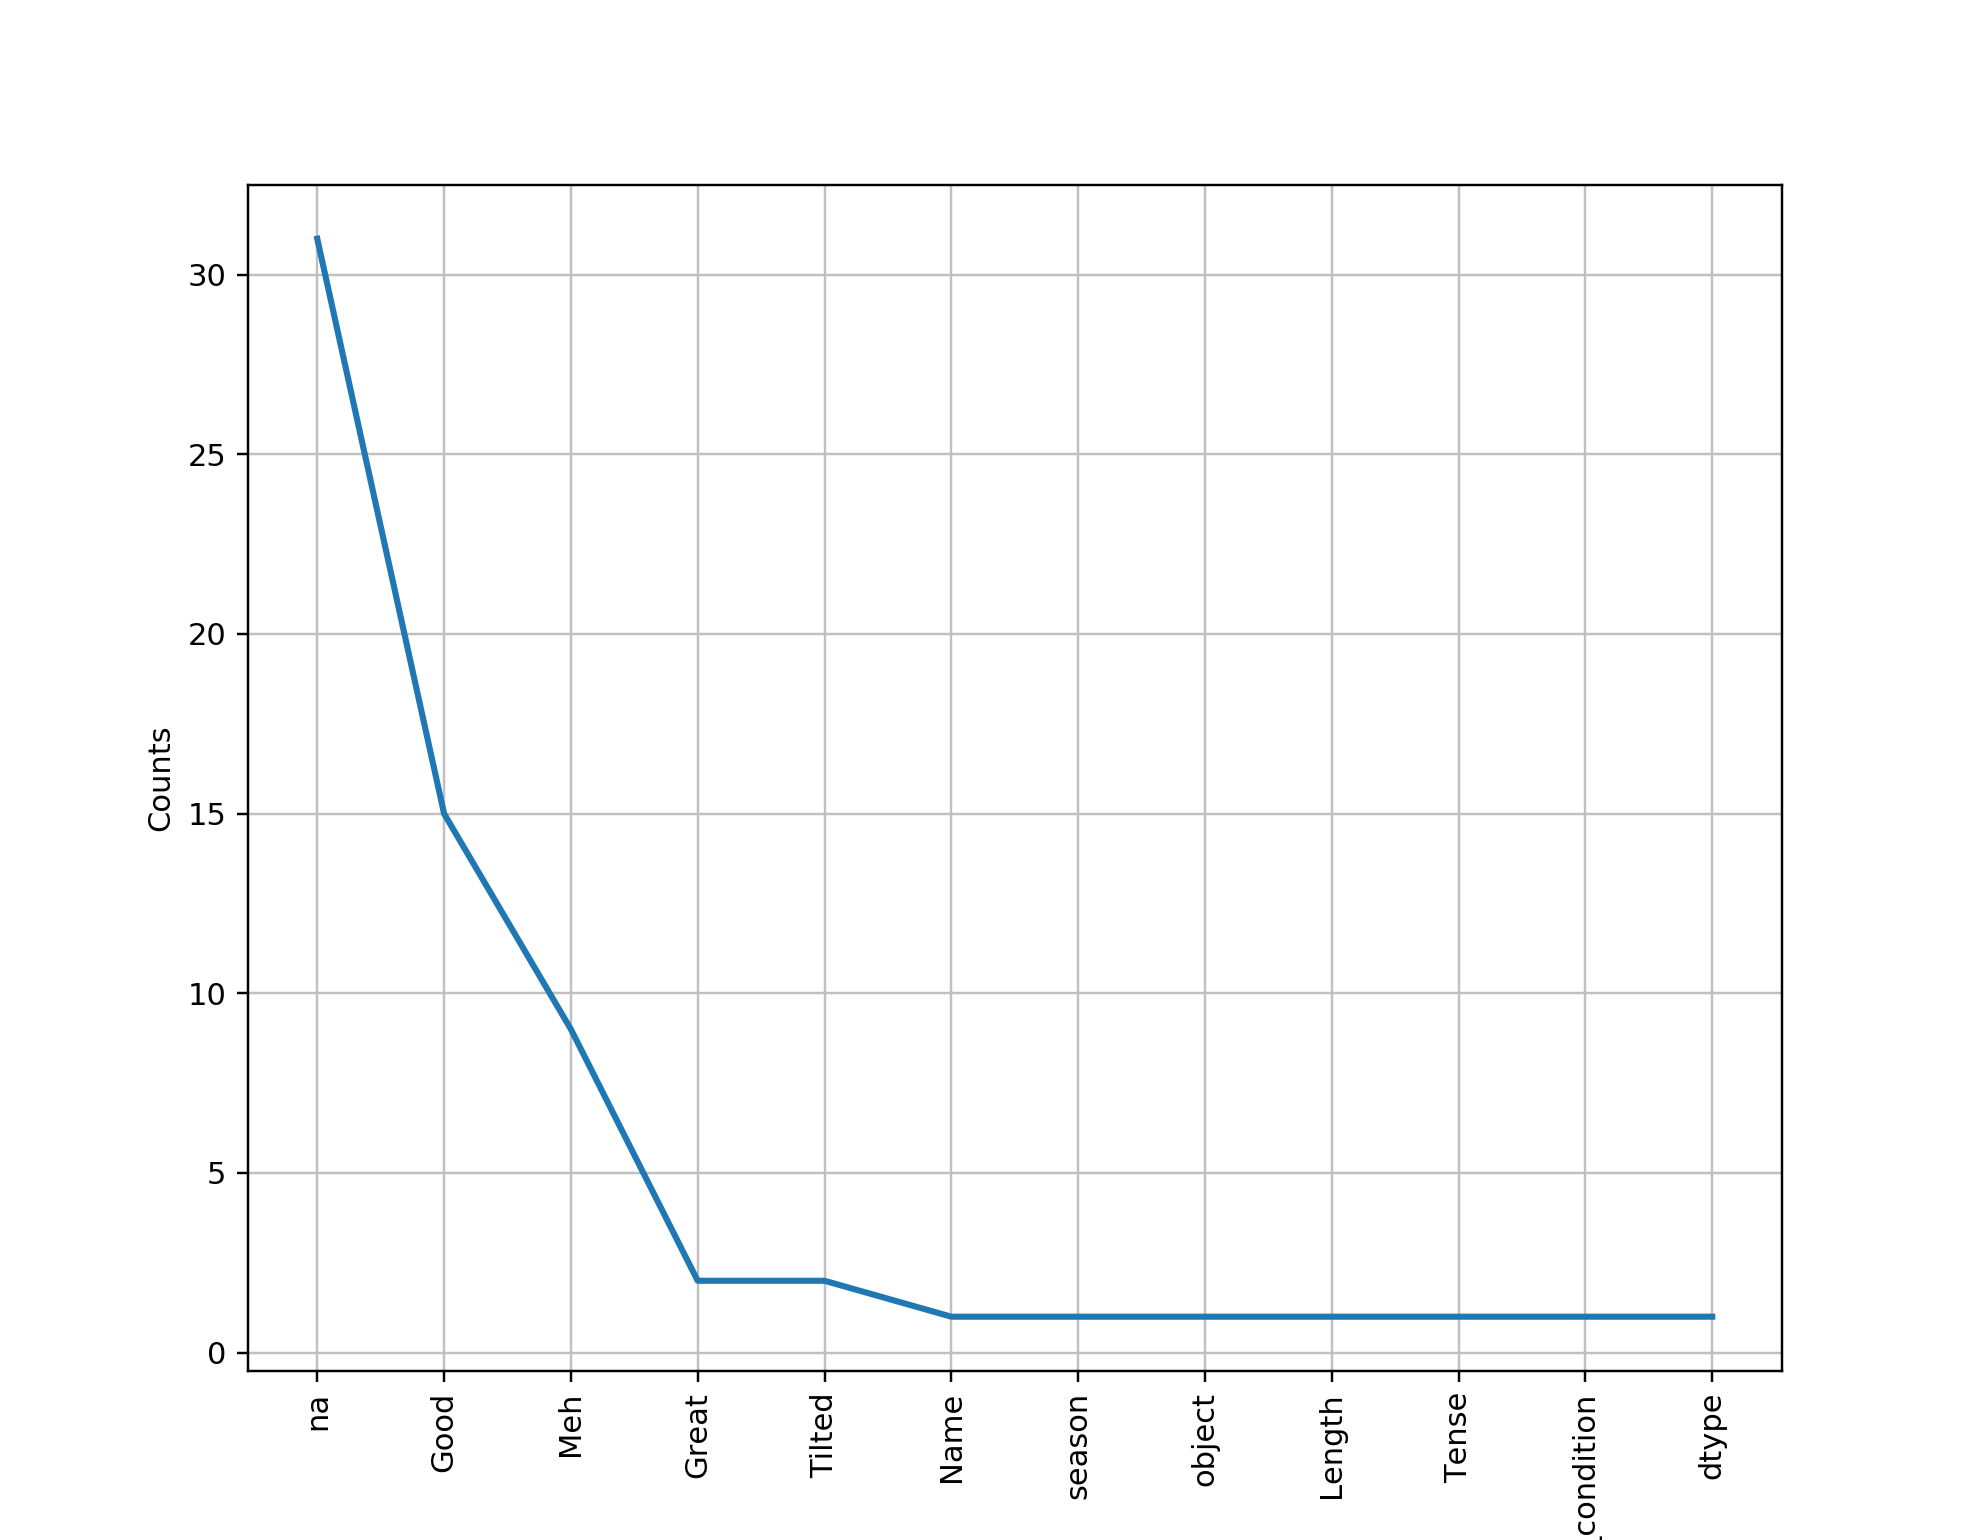

In [56]:
plt.figure(figsize = (9, 7))
fdist.plot(30)

<IPython.core.display.Javascript object>


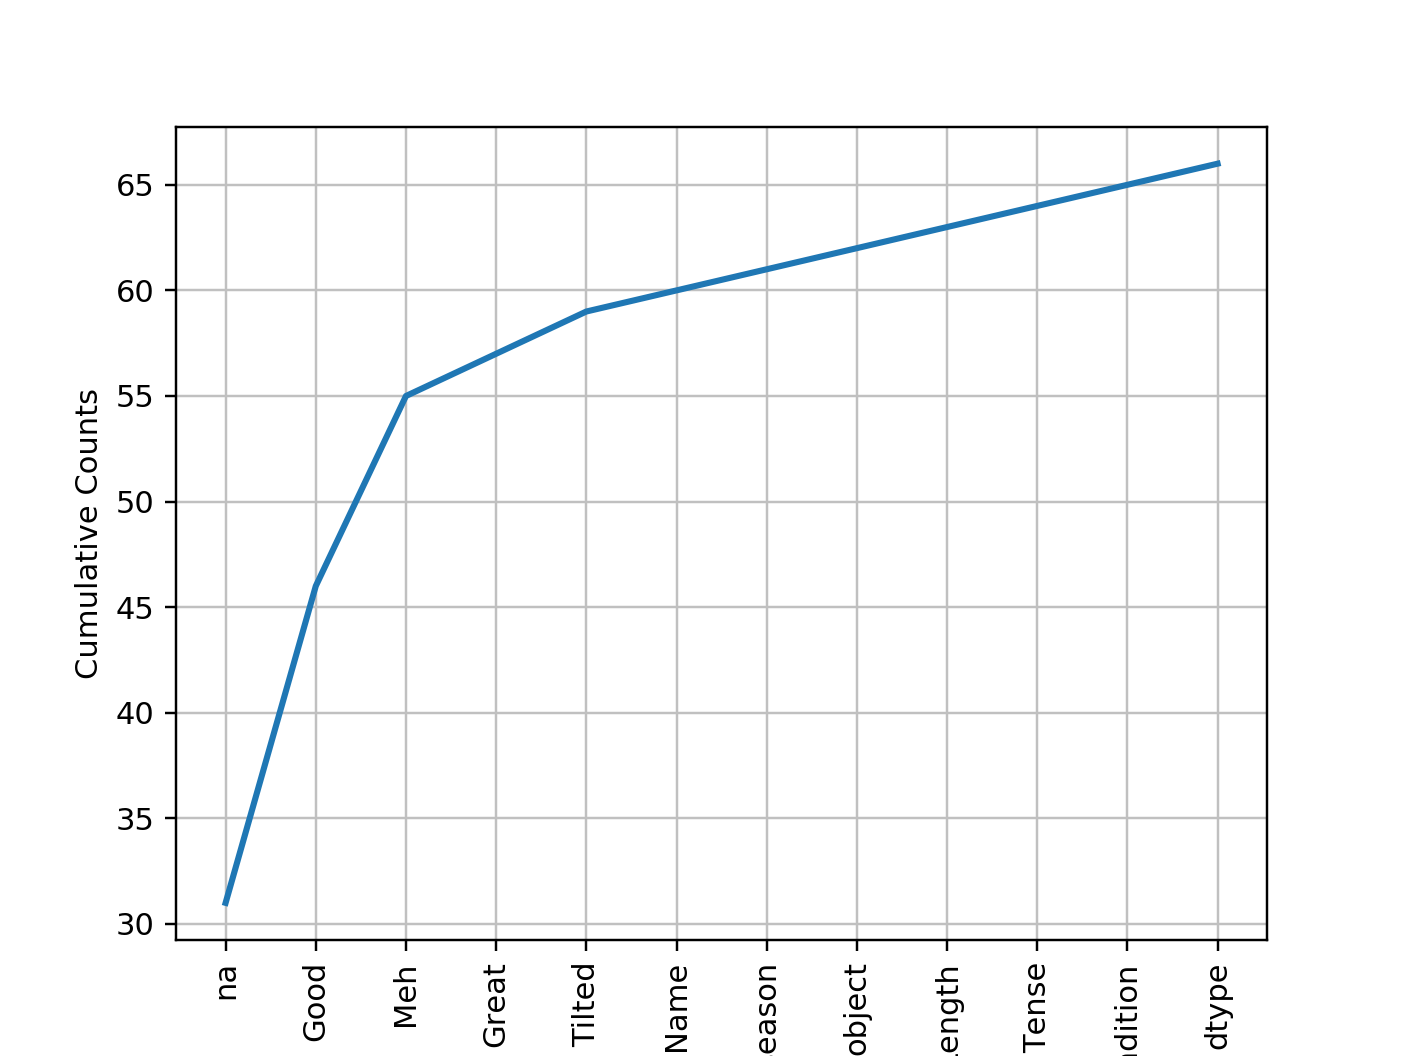

In [53]:
plt.figure()
fdist.plot(cumulative=True)

## SHORTCOMINGS, ASSUMPTIONS, NEXT-STEPS
## SHORTCOMINGS
- Need to figure out how to approach how to fill in nulls. For example, team_role has some empty values
- There is quite a bit data missing from some of the float features. It is worth considering whether it is enough instances to accurately predict result

## ASSUMPTIONS
- We are assuming that there are enough games played to accurately predict whether we will win or lose


## NEXT-STEPS
- Create alternate ways to determine how second and third heroes were picked
- Figure out how to fill nulls on Object values
- Create features that could be interesting (example: change in sr before and after match)